In [1]:
def MVO_Robust(mu_hat, Sigma_hat, kappa, delta, lmd = 1):
    N = len(mu_hat)
    S12 = np.linalg.cholesky(Sigma_hat)  # S12 such that S12^T @ S12 = Sigma
    w = cp.Variable(N)
    objective = cp.Maximize(w.T @ mu_hat - kappa * cp.pnorm(S12 @ w , 2)
                            - lmd/2 * ((cp.pnorm(S12 @ w, 2) + delta * cp.pnorm(w, 2))**2))
    constraints = [w >= 0, cp.sum(w) == 1]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    return w.value

In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
np.random.seed(100)

tickers = ['AMD','AEZS','AA','ADI','A','CF', 'AAPL','TSLA','NVDA','APD']

data = yf.download(tickers, period='10y', auto_adjust=True)['Close'][tickers] #!!!! yf download default at alphabetical order
returns = (data/data.shift(1)-1).dropna()

mu = returns.mean()
Sigma = returns.cov()
T = len(returns)    
# Set parameters
kappa = 1
delta = 0.5 * np.sqrt(T)
w_all_Markowitz_robust = []  # List to store portfolio allocations

# Number of iterations
for i in range(20):
    X_noisy = np.random.multivariate_normal(mu, Sigma, size = T)
    mu_noisy = np.mean(X_noisy, axis = 0)
    Sigma_noisy = np.cov(X_noisy, rowvar = False)
    
    w_Markowitz_robust_noisy = MVO_Robust(mu_noisy, Sigma_noisy, kappa, delta/np.sqrt(T - 1))
    w_all_Markowitz_robust.append(w_Markowitz_robust_noisy)

# Convert the list of portfolio allocations to a numpy array
w_all_Markowitz_robust = np.array(w_all_Markowitz_robust)
w_all_Markowitz_robust

[*********************100%%**********************]  10 of 10 completed


array([[0.03939884, 0.04276155, 0.07266052, 0.08919041, 0.12747758,
        0.13007076, 0.12332271, 0.09768322, 0.12920687, 0.14822754],
       [0.03789771, 0.04022731, 0.07376746, 0.08753688, 0.1261414 ,
        0.12639744, 0.12305684, 0.10013455, 0.13264666, 0.15219375],
       [0.03610023, 0.03884375, 0.07575063, 0.08906831, 0.13172499,
        0.12553488, 0.12481139, 0.09623933, 0.13048507, 0.15144142],
       [0.03851614, 0.03895348, 0.07306565, 0.09288516, 0.12819881,
        0.12511667, 0.12462085, 0.09813288, 0.13122375, 0.14928662],
       [0.03851882, 0.03940032, 0.0702729 , 0.09626694, 0.12827643,
        0.12299721, 0.12417185, 0.09851408, 0.13078044, 0.15080101],
       [0.03744058, 0.03442056, 0.07241132, 0.09065045, 0.12956615,
        0.12929079, 0.12599693, 0.09807764, 0.13220841, 0.14993717],
       [0.03210779, 0.04410121, 0.07760642, 0.09555963, 0.12689875,
        0.12533814, 0.12156371, 0.0957854 , 0.1309388 , 0.15010016],
       [0.0356822 , 0.0384712 , 0.0746403

In [5]:
MVO_Robust(mu,Sigma,kappa, delta/np.sqrt(T - 1))

array([0.03752824, 0.03883653, 0.07430877, 0.09119002, 0.12654504,
       0.12738541, 0.12479553, 0.09849159, 0.13071127, 0.15020761])

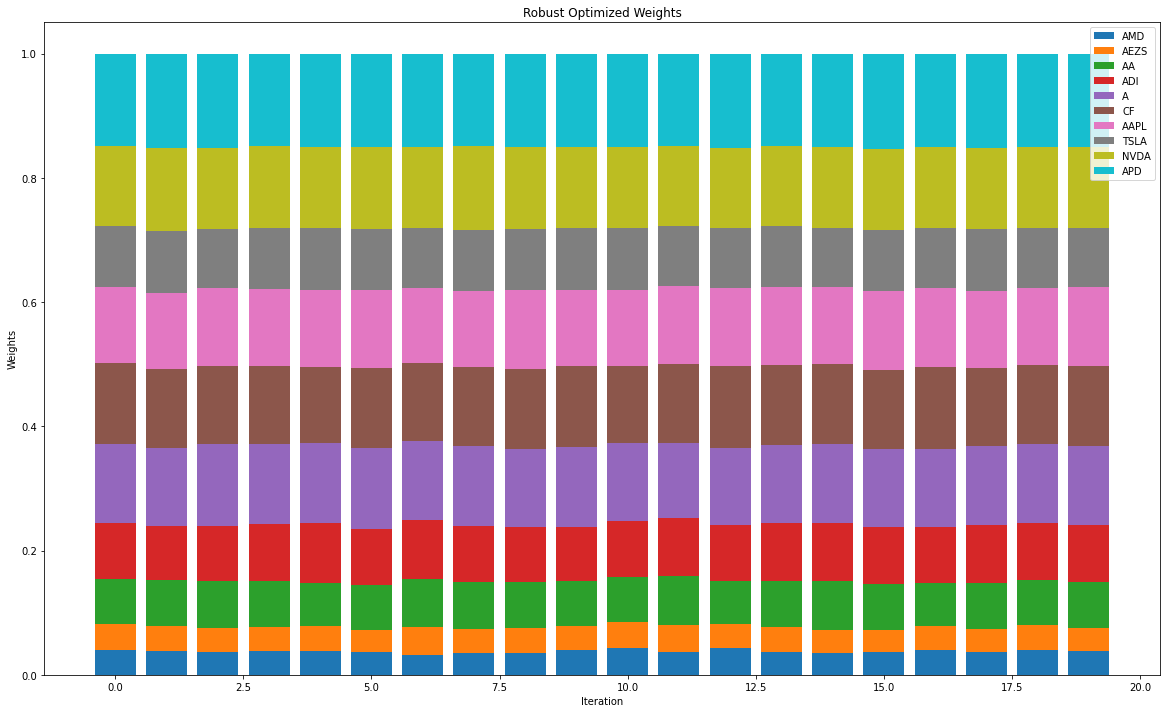

In [4]:
# Create x-axis values (iterations)
w_all_Markowitz_robust = w_all_Markowitz_robust.T
iterations = np.arange(len(w_all_Markowitz_robust[0]))

# Create a stacked bar plot
plt.figure(figsize=(20, 12))  # Adjust the figure size as needed
bottom = np.zeros(len(w_all_Markowitz_robust[0]))

for i, asset_weights in enumerate(w_all_Markowitz_robust):
    plt.bar(iterations, asset_weights, label= tickers[i], bottom=bottom)
    bottom += asset_weights

# Add labels and legend
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.title('Robust Optimized Weights')
plt.legend()

# Show the plot
plt.show()